In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,...,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 64
0,0,0,0,0,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,3.5000,562,618.0,56.0
1,1,1,1,1,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.8000,473,613.4,140.4
2,2,2,2,2,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.8000,524,613.4,89.4
3,3,3,3,3,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.9250,538,617.0,79.0
4,4,4,4,4,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,3.1000,576,624.6,48.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,152,152,-0.467859,-0.729457,-0.258929,0.421871,-0.453863,-0.800754,...,0,0,0,0,0,0,3.3750,552,601.0,49.0
152,152,153,153,153,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,8.3000,532,590.0,58.0
153,153,154,154,154,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,3.1250,570,610.4,40.4
154,154,155,155,155,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,2.8500,562,594.2,32.2


In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x7_None',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

output_col = ['diameter_nm', 'abs_nm', 'emission_nm']

X = df[input_col]

Y = df[output_col]

In [4]:
# Splitting dataset for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45, shuffle=True)

In [5]:
Y.shape

(156, 3)

In [6]:
X.shape

(156, 58)

In [8]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(Y_test.iloc[:, column], Y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  0.414422887609184 
 R^2 for Absorbance is  0.5355825115450464 
 R^2 for PL is  0.7083030501724225 
 

K-nn 

 R^2 for diameter is  0.3516815242986113 
 R^2 for Absorbance is  0.2659309424084876 
 R^2 for PL is  0.2561523629122351 
 

Linear regression 

 R^2 for diameter is  -0.6537369893277609 
 R^2 for Absorbance is  0.15222262237651907 
 R^2 for PL is  0.31042934062043337 
 

Ridge 

 R^2 for diameter is  0.16621342659758298 
 R^2 for Absorbance is  0.43609366269060923 
 R^2 for PL is  0.44784333600625315 
 

Lasso 

 R^2 for diameter is  -0.04207957074238555 
 R^2 for Absorbance is  0.318971351481557 
 R^2 for PL is  0.34605905944052306 
 

ElasticNet 

 R^2 for diameter is  -0.04207957074238555 
 R^2 for Absorbance is  0.2547453632619181 
 R^2 for PL is  0.20807837382717642 
 

RandomForestRegressor 

 R^2 for diameter is  0.07966179044954813 
 R^2 for Absorbance is  0.3107755168132509 
 R^2 for PL is  0.45702455647202767 
 

Decision Tree Regre

## Optimizing


### 1. Extra Trees

In [7]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, Y_train)
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:59<00:00, 22.47s/it]

12.477884160756497 3 17 45


In [9]:

ET_regr = ExtraTreesRegressor(n_estimators=2,
                            max_features=20,     
                            random_state=23).fit(X_train, Y_train)
            
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.5226717146087895 ; MSE: 0.5153475587545118 ; RMSE: 0.7178771195368409 ; MAE: 0.4718686867727273
absorbance:  r2: 0.7241021737535902 ; MSE: 1002.882996601852 ; RMSE: 31.668327972942492 ; MAE: 20.28787878636364
emission:  r2: 0.830417511744725 ; MSE: 425.146464487374 ; RMSE: 20.619080107690884 ; MAE: 11.878787875757581


### 2. Decision Tree 

In [8]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 46, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:00<00:00,  6.05s/it]

12.900874704491725 13 15 24


In [11]:
DT_regr = DecisionTreeRegressor(max_depth=13,
                                max_features=9,
                                random_state=10)
            
DT_regr.fit(X_train, Y_train)            
DT_Y_pred = DT_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    DT_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i], squared=False)
    DT_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; RMSE:', DT_RMSE, '; MAE:', DT_MAE )

diameter:  r2: 0.09241622102366664 ; MSE: 0.9798729703966971 ; RMSE: 0.9898853319434009 ; MAE: 0.6765219445658338
absorbance:  r2: 0.1477935710543501 ; MSE: 3097.7530660972293 ; RMSE: 55.65746190850989 ; MAE: 41.633629528534726
emission:  r2: 0.4902467614551588 ; MSE: 1277.9608871058474 ; RMSE: 35.74857881239263 ; MAE: 24.710830107461845


### 3. Random Forest

In [9]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, Y_train)
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [17:07<00:00, 34.25s/it]

14.20264479905437 12 1 19


In [37]:
RF_regr = RandomForestRegressor(max_depth=15, 
                                n_estimators=6, 
                                max_features=45,
                                random_state=45)
            
RF_regr.fit(X_train, Y_train)            
RF_Y_pred = RF_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    RF_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE )

diameter:  r2: 0.33764141010425563 ; MSE: 1.1115826191109626 ; RMSE: 1.0543161855491752 ; MAE: 0.7323104443390259
absorbance:  r2: 0.6815129446618853 ; MSE: 1380.4011089991168 ; RMSE: 37.15374959541926 ; MAE: 23.32659633745971
emission:  r2: 0.6270426982174335 ; MSE: 1224.9707283873392 ; RMSE: 34.999581831606775 ; MAE: 23.733777597060328


### 4. K Neighbors

In [10]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, Y_train)

        KNN_Y_pred = KNN_reg.predict(X_test)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  2.04it/s]

17.085921985815602 2 4


In [52]:
KNN_reg = KNeighborsRegressor(n_neighbors=1, 
                              p=1).fit(X_train, Y_train)

KNN_Y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i], squared=False)
    KNN_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE, '; RMSE:', KNN_RMSE, '; MAE:', KNN_MAE)

diameter: r2: 0.3864332337862958 ; MSE: 1.0296992647058822 ; RMSE: 1.0147409840475954 ; MAE: 0.7133823529411765
Abs: r2: 0.6174399016788297 ; MSE: 1658.109411764706 ; RMSE: 40.719889633503506 ; MAE: 28.7
PL: r2: 0.641976769263004 ; MSE: 1175.9200735294119 ; RMSE: 34.29169102755669 ; MAE: 19.38088235294118


### 5. Lasso

In [54]:
min_mae = 9999

min_i, min_j = 0, 0

for i in tqdm(np.arange(0.1, 2.0, 0.02)):
    for j in range(1, 100):
        L_reg = Lasso(alpha=i, random_state=j).fit(X_train, Y_train)
        
        L_Y_pred = L_reg.predict(X_test)
        L_r2 = r2_score(Y_test, pd.DataFrame(L_Y_pred))
      
        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

            
print(min_mae, min_i, min_j)

  0%|          | 0/95 [00:00<?, ?it/s]/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

18.478823529411766 0.1 1


### Saving Extra Trees model

In [11]:
ET_regr = ExtraTreesRegressor(n_estimators=3,
                            max_features=17,     
                            random_state=45).fit(X_train, Y_train)

ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./model_MO_ExtraTrees.joblib")

['./model_MO_ExtraTrees.joblib']

## Analyzing

In [21]:
ET_regr = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=17,
                                            random_state=45)
            
ET_regr.fit(X_train, Y_train)
ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))


outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MAE:', ET_MAE, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE )

diameter:  r2: 0.46208823112605757 ; MAE: 0.2818794326241135 ; MSE: 0.2953399453309693 ; RMSE: 0.5434518794989758
absorbance:  r2: 0.6446863092922173 ; MAE: 22.248226950354606 ; MSE: 953.0520094562646 ; RMSE: 30.871540445145666
emission:  r2: 0.5912686154475235 ; MAE: 14.903546099290772 ; MSE: 605.5953664302592 ; RMSE: 24.608847320227316


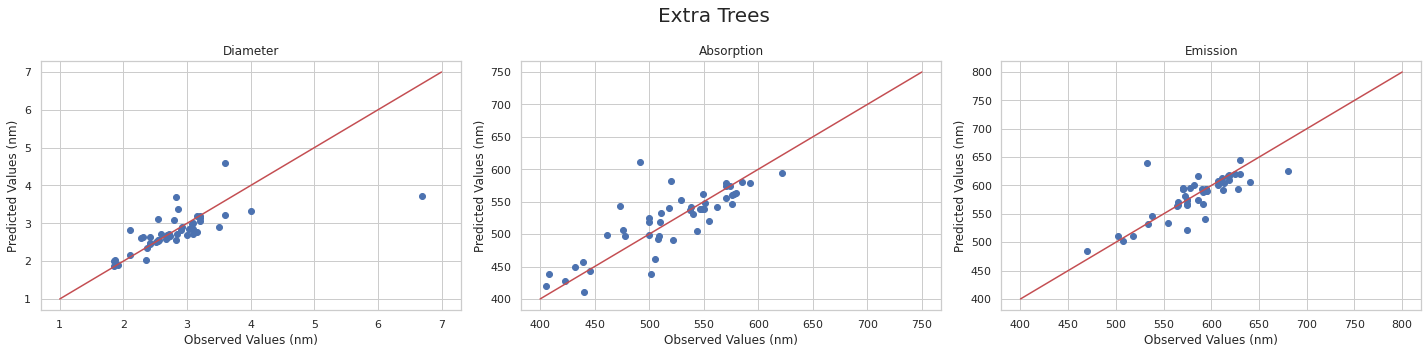

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(Y_test.iloc[:, 0], pd.DataFrame(ET_Y_pred).loc[:, 0],'o')
ax1.plot([1,7],[1,7], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test.iloc[:, 1], pd.DataFrame(ET_Y_pred).loc[:, 1],'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test.iloc[:, 2], pd.DataFrame(ET_Y_pred).loc[:, 2],'o')
ax3.plot([400,800],[400,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

In [14]:
importance_dict = dict()
for i in range(0,58):
    importance_dict[input_col[i]] = ET_regr.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance


[('time_min', 0.17543507473547795),
 ('temp_c', 0.15888743954142778),
 ('x7_zinc oleate', 0.07586003520910296),
 ('zinc_amount_mmol', 0.06610981441491066),
 ('acid_amount_mmol', 0.0536853134758958),
 ('total_volume_ml', 0.04178611349720388),
 ('x7_None', 0.03272129299555929),
 ('x7_zinc chloride', 0.030969280752450437),
 ('in_amount_mmol', 0.029960908096500705),
 ('x5_oleylamine', 0.024752836797524255),
 ('x7_zinc undecylenate', 0.022197108628444165),
 ('x8_water', 0.021538061450217794),
 ('amine_amount_mmol', 0.019642720637728237),
 ('p_amount_mmol', 0.01960674480027737),
 ('x5_None', 0.019109476793953504),
 ('x7_zinc iodide', 0.0188105558221795),
 ('x2_None', 0.017750715998900265),
 ('x1_tris(dimethylamino)phosphine', 0.01700682708959983),
 ('x0_indium iodide', 0.014449446822794644),
 ('x8_copper bromide', 0.013201702437470417),
 ('other_amount_mmol', 0.011992001732627785),
 ('x8_None', 0.011229628741859338),
 ('x5_octylamine', 0.010899902714594645),
 ('x1_tris(diethylamino)phosphine

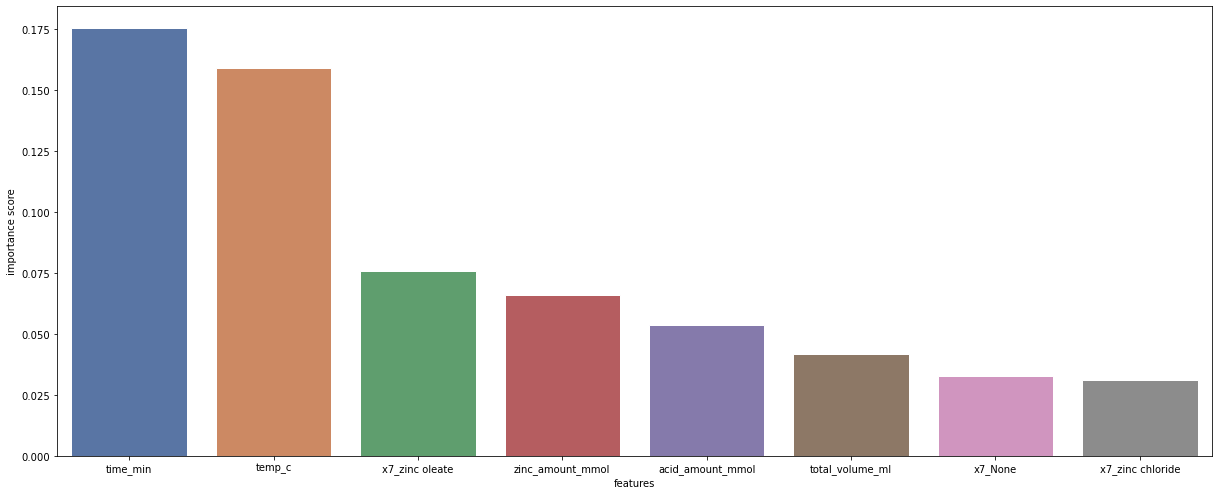

In [15]:
top7 = DataFrame(sorted_importance[0:8], columns=['features', 'importance score'])

others2 = DataFrame(sorted_importance[8:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)

In [7]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [13]:
X

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x8_None,x8_acetic acid,x8_copper bromide,x8_superhydride,x8_oleic acid,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide
0,2.798293,0.769563,-0.528015,1.951881,-0.431077,-0.641827,-0.197117,-0.629015,8.009708,0.412626,...,0,0,0,0,0,0,0,1,0,0
1,0.055436,-0.361432,-0.528015,1.958217,-0.431077,-0.641827,-0.197117,-0.629015,3.873052,0.063284,...,0,0,0,0,0,0,0,1,0,0
2,0.782458,0.017999,-0.528015,0.600491,-0.431077,-0.641827,-0.197117,-0.629015,-0.098139,-0.500811,...,0,0,0,0,0,0,0,1,0,0
3,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,-0.197117,-0.629015,3.873052,0.063284,...,0,0,0,0,0,0,0,1,0,0
4,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,-0.197117,-0.629015,3.873052,0.063284,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,-0.197117,-0.629015,-0.263605,-0.225133,...,1,0,0,0,0,0,0,0,0,0
213,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,-0.197117,-0.629015,-0.263605,-0.225133,...,1,0,0,0,0,0,0,0,0,0
214,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,-0.197117,-0.629015,-0.263605,-0.225133,...,1,0,0,0,0,0,0,0,0,0
215,-0.423738,-0.631411,-0.201566,-0.304661,-0.085945,-0.600008,-0.197117,-0.629015,-0.263605,-0.346416,...,1,0,0,0,0,0,0,0,0,0


In [26]:
FeatureMatrix = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml']

Output = ['diameter_nm', 'emission_nm', 'abs_nm']

FeatureMatrix_and_outputs = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min','diameter_nm', 'emission_nm', 'abs_nm']
df_corr = df[FeatureMatrix_and_outputs]
df_corr

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,temp_c,time_min,diameter_nm,emission_nm,abs_nm
0,2.798293,0.769563,-0.528015,1.951881,-0.431077,-0.641827,-0.197117,-0.629015,8.009708,0.412626,1.175040,3.449769,2.753333,612.000000,599.0
1,0.055436,-0.361432,-0.528015,1.958217,-0.431077,-0.641827,-0.197117,-0.629015,3.873052,0.063284,0.975942,3.449769,2.600000,613.000000,530.0
2,0.782458,0.017999,-0.528015,0.600491,-0.431077,-0.641827,-0.197117,-0.629015,-0.098139,-0.500811,0.975942,3.449769,3.500000,610.000000,595.0
3,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,-0.197117,-0.629015,3.873052,0.063284,0.975942,3.449769,2.520000,612.000000,520.0
4,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,-0.197117,-0.629015,3.873052,0.063284,0.975942,7.207882,2.660000,612.000000,590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,-0.197117,-0.629015,-0.263605,-0.225133,0.975942,-0.303125,5.433333,605.000000,570.0
213,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,-0.197117,-0.629015,-0.263605,-0.225133,0.975942,-0.256148,5.433333,605.000000,562.0
214,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,-0.197117,-0.629015,-0.263605,-0.225133,0.975942,-0.203952,5.433333,589.666667,549.0
215,-0.423738,-0.631411,-0.201566,-0.304661,-0.085945,-0.600008,-0.197117,-0.629015,-0.263605,-0.346416,-1.413230,0.787772,2.000000,597.000000,523.0


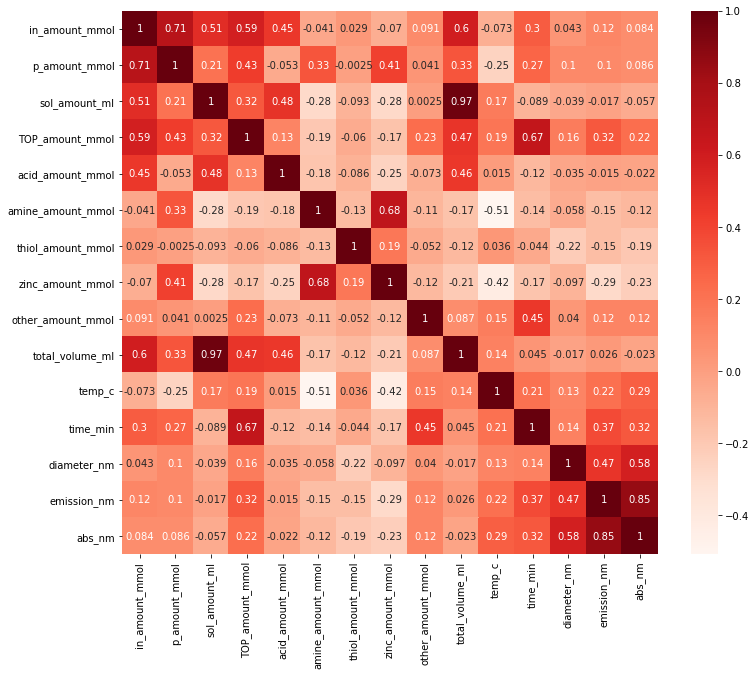

In [27]:

X_cor = df[FeatureMatrix]  #Feature Matrix
y_cor = df[Output]          #Target Variable

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
#Correlation with output variable
cor_target = abs(cor['diameter_nm'])+abs(cor['emission_nm'])+abs(cor['abs_nm'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>-0.5]
relevant_features.sort_values()

total_volume_ml      0.066488
acid_amount_mmol     0.071999
sol_amount_ml        0.112826
in_amount_mmol       0.242876
other_amount_mmol    0.285736
p_amount_mmol        0.290277
amine_amount_mmol    0.321514
thiol_amount_mmol    0.553382
zinc_amount_mmol     0.612423
temp_c               0.639541
TOP_amount_mmol      0.702336
time_min             0.828630
diameter_nm          2.053200
emission_nm          2.323958
abs_nm               2.435253
dtype: float64